Importing required libraries

In [11]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

*   Loads an image in grayscale mode.
*   Resizes it to 256×256 for uniform processing.
*   Normalizes pixel values to [0,1] for better performance.
*   Expands dimensions to match TensorFlow’s input format (batch_size, height, width, channels).





In [12]:
# Load a grayscale image
image = cv2.imread('input_image.jpg', cv2.IMREAD_GRAYSCALE)

# Resize image to 256x256 for consistency
image = cv2.resize(image, (256, 256))

# Normalize pixel values to range [0,1]
image = image.astype(np.float32) / 255.0

# Expand dimensions to match TensorFlow's input format
image = np.expand_dims(image, axis=(0, -1))  # Shape: (1, 256, 256, 1)

Uses Matplotlib to display the original image.

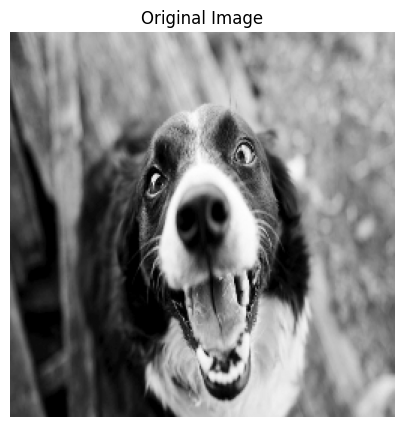

In [15]:
# Convert image tensor to NumPy for visualization
original_image_np = image.squeeze()

# Display Original Image
plt.figure(figsize=(5,5))
plt.imshow(original_image_np, cmap='gray')
plt.title("Original Image")
plt.axis("off")
plt.show()

*   Sobel X detects horizontal edges.
*   Sobel Y detects vertical edges.
*   Reshapes filters into (3,3,1,1) format for TensorFlow.

In [13]:
# Sobel X filter
sobel_x = np.array([[-1, 0, 1],
                     [-2, 0, 2],
                     [-1, 0, 1]], dtype=np.float32)

# Sobel Y filter
sobel_y = np.array([[-1, -2, -1],
                     [0,  0,  0],
                     [1,  2,  1]], dtype=np.float32)

# Reshape filters for TensorFlow compatibility
sobel_x = sobel_x.reshape(3, 3, 1, 1)  # (height, width, in_channels, out_channels)
sobel_y = sobel_y.reshape(3, 3, 1, 1)


*   Uses tf.nn.conv2d() to apply Sobel X and Y.
*   Computes gradient magnitude to detect edges.


In [16]:
# Convert image and filters to TensorFlow tensors
image_tensor = tf.constant(image, dtype=tf.float32)
sobel_x_tensor = tf.constant(sobel_x, dtype=tf.float32)
sobel_y_tensor = tf.constant(sobel_y, dtype=tf.float32)

# Apply convolution
edge_x = tf.nn.conv2d(image_tensor, sobel_x_tensor, strides=[1,1,1,1], padding='SAME')
edge_y = tf.nn.conv2d(image_tensor, sobel_y_tensor, strides=[1,1,1,1], padding='SAME')

# Compute magnitude of gradients
edge_magnitude = tf.sqrt(tf.square(edge_x) + tf.square(edge_y))


*   Converts tensors into NumPy arrays.
*   Displays Sobel X, Sobel Y, and Edge Magnitude using Matplotlib.

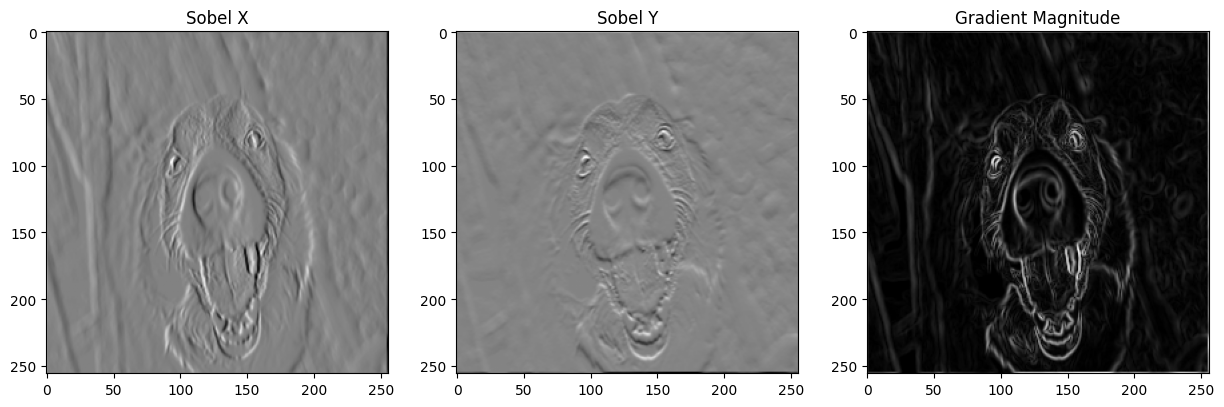

In [17]:
# Convert tensors to NumPy arrays for visualization
edge_x_np = edge_x.numpy().squeeze()
edge_y_np = edge_y.numpy().squeeze()
edge_mag_np = edge_magnitude.numpy().squeeze()

# Plot Filtered Images
plt.figure(figsize=(15,5))

plt.subplot(1,3,1), plt.imshow(edge_x_np, cmap='gray'), plt.title('Sobel X')
plt.subplot(1,3,2), plt.imshow(edge_y_np, cmap='gray'), plt.title('Sobel Y')
plt.subplot(1,3,3), plt.imshow(edge_mag_np, cmap='gray'), plt.title('Gradient Magnitude')

plt.show()


Create a random 4x4 matrix as an input image

In [22]:
input_matrix = np.random.rand(4, 4).astype(np.float32)
print("Original 4x4 Matrix:")
print(input_matrix)

Original 4x4 Matrix:
[[0.6937802  0.48426837 0.5629495  0.9721443 ]
 [0.29195318 0.10035739 0.41914535 0.35348448]
 [0.85609436 0.68784297 0.4379844  0.58928156]
 [0.3583016  0.61209196 0.10912912 0.26719895]]


Expand dimensions to match TensorFlow's input format (batch_size, height, width, channels)

In [23]:
input_tensor = tf.constant(input_matrix, shape=[1, 4, 4, 1], dtype=tf.float32)

Apply Max Pooling (2x2)

In [24]:
pooled_max = tf.nn.max_pool2d(input_tensor, ksize=2, strides=2, padding='VALID')
pooled_max_np = pooled_max.numpy().squeeze()
print("\nMax-Pooled 2x2 Matrix:")
print(pooled_max_np)



Max-Pooled 2x2 Matrix:
[[0.6937802  0.9721443 ]
 [0.85609436 0.58928156]]


Apply Average Pooling (2x2)

In [25]:
pooled_avg = tf.nn.avg_pool2d(input_tensor, ksize=2, strides=2, padding='VALID')
pooled_avg_np = pooled_avg.numpy().squeeze()
print("\nAverage-Pooled 2x2 Matrix:")
print(pooled_avg_np)


Average-Pooled 2x2 Matrix:
[[0.3925898 0.5769309]
 [0.6285827 0.3508985]]
